***First, we will upload the allFaces.mat file and create the faces.***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams.update({'font.size': 10})

# Upload .mat file
mat_contents = scipy.io.loadmat(r"allFaces.mat")

# Create the faces
faces = mat_contents['faces']
m = mat_contents['m']
m = np.mean(m)
m = int(m)
n = mat_contents['n']
n = np.mean(n)
n = int(n)

# Flatten and print the shapes
nfaces = np.ndarray.flatten(mat_contents['nfaces'])
print('The shape of the images (pixels) is ' + str(m) + ' by ' + str(n))
print('The following vector lists the number of images taken of each the 38 individuals :')
print(nfaces)

The shape of the images (pixels) is 168 by 192
The following vector lists the number of images taken of each the 38 individuals :
[64 62 64 64 62 64 64 64 64 64 60 59 60 63 62 63 63 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64]


***Next, we will create the image with the first 36 people's faces and print it.***

(-0.5, 1007.5, 1151.5, -0.5)

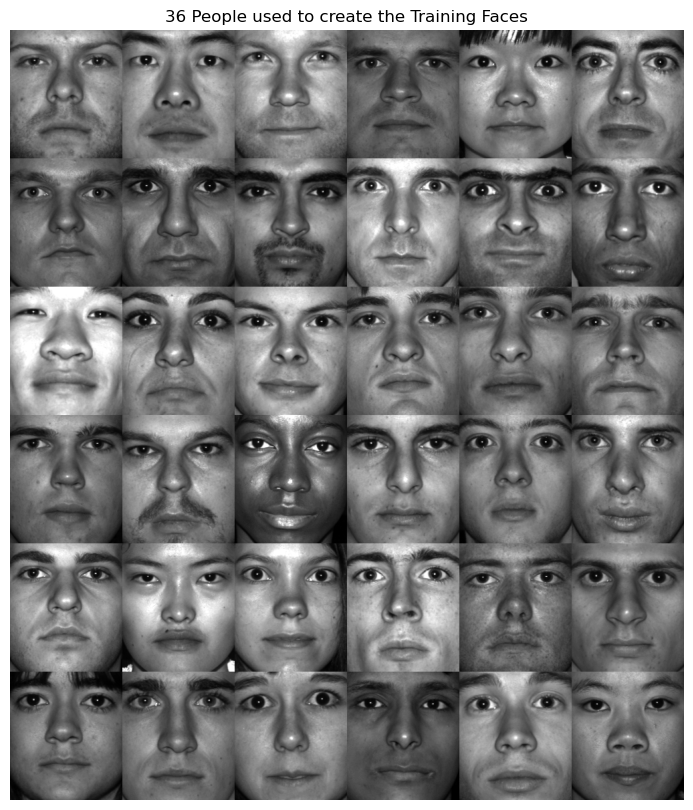

In [2]:
# Create image will the 36 faces.
allPersons = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:, np.sum(nfaces[:count])],(m,n)).T
        count += 1

#Print the image.
fig1 = plt.figure(1)
img = plt.imshow(allPersons)          
img.set_cmap('gray')
plt.title('36 People used to create the Training Faces')
plt.axis('off')

***Now, we will create the trainingFaces which we will use to find the "average face" and to predict future images.***

The shape of training faces is : (32256, 2282)


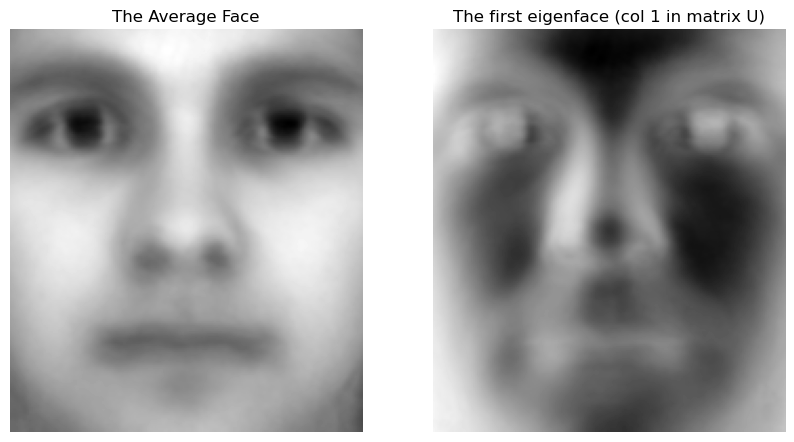

In [3]:
# Build training faces, leaving out individual 37 and 38 from "faces"
trainingFaces = faces[:,:np.sum(nfaces[:36])] 
print('The shape of training faces is :', np.shape(trainingFaces))

# Compute the average of each face
avgFace = np.mean(trainingFaces, axis = 1)
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1], 1) ).T

# Compute the SVD of X
U, S, VT = np.linalg.svd(X,full_matrices = 0)

# Output the average face and the eigenface of col 1 in matrix U.
fig2 = plt.figure(2)
ax1 = fig2.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')
plt.title('The Average Face')

ax2 = fig2.add_subplot(122)
img_avg2 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)
img_avg2.set_cmap('gray')
plt.axis('off')
plt.title('The first eigenface (col 1 in matrix U)')
plt.show()

***Let's predict person 37's face using the rest of the collection of faces.***

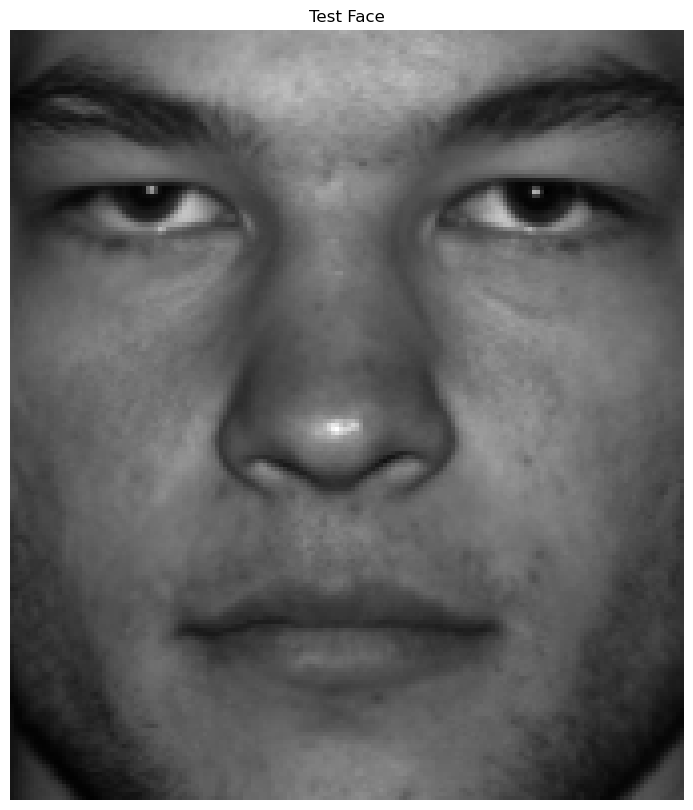

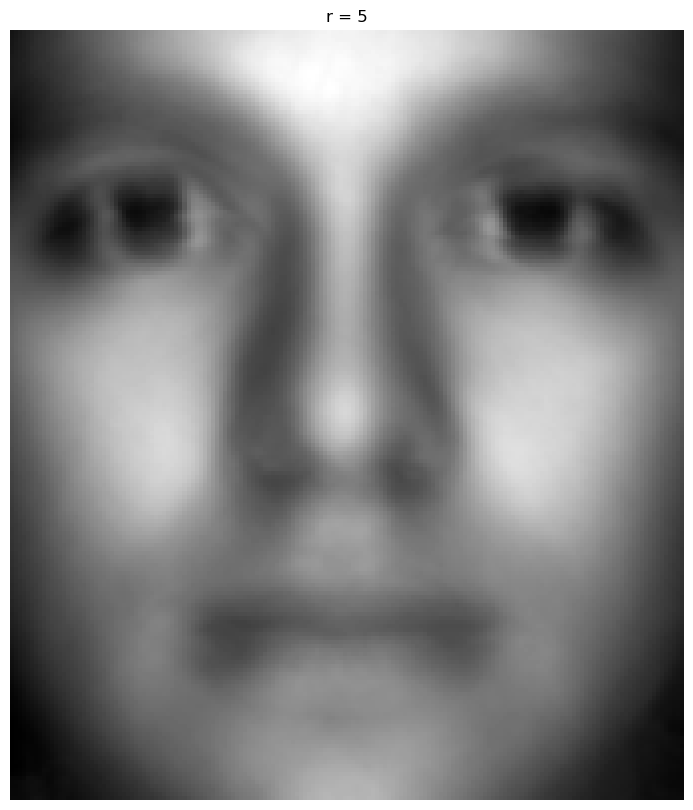

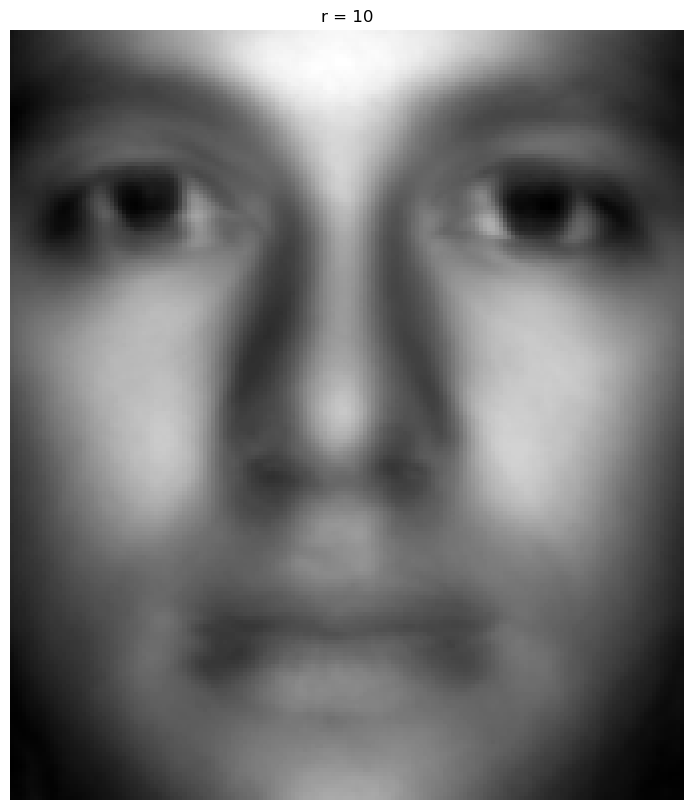

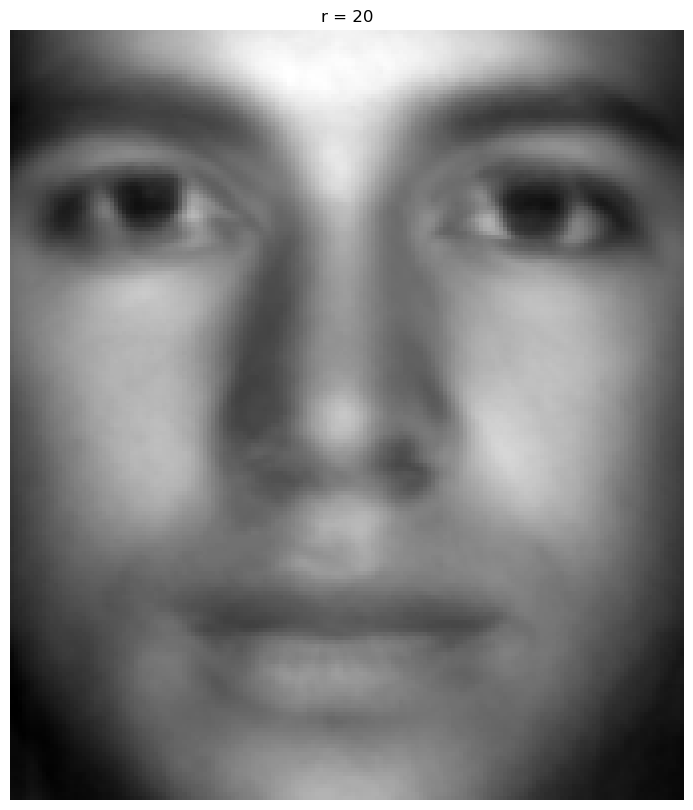

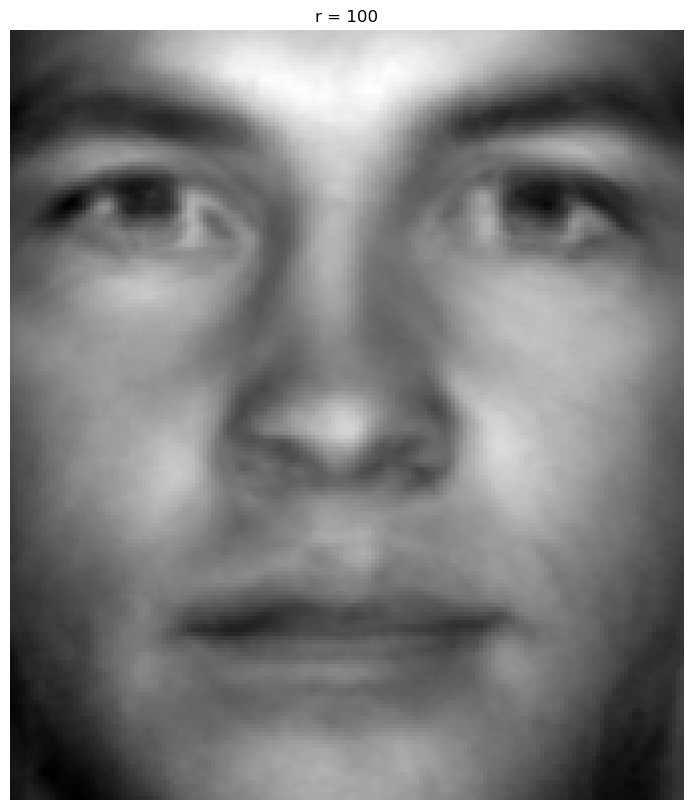

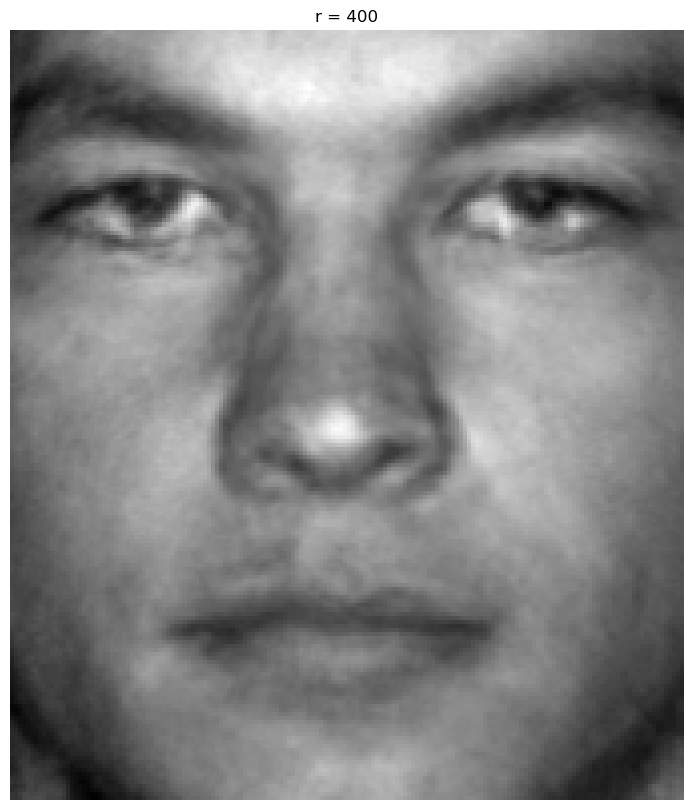

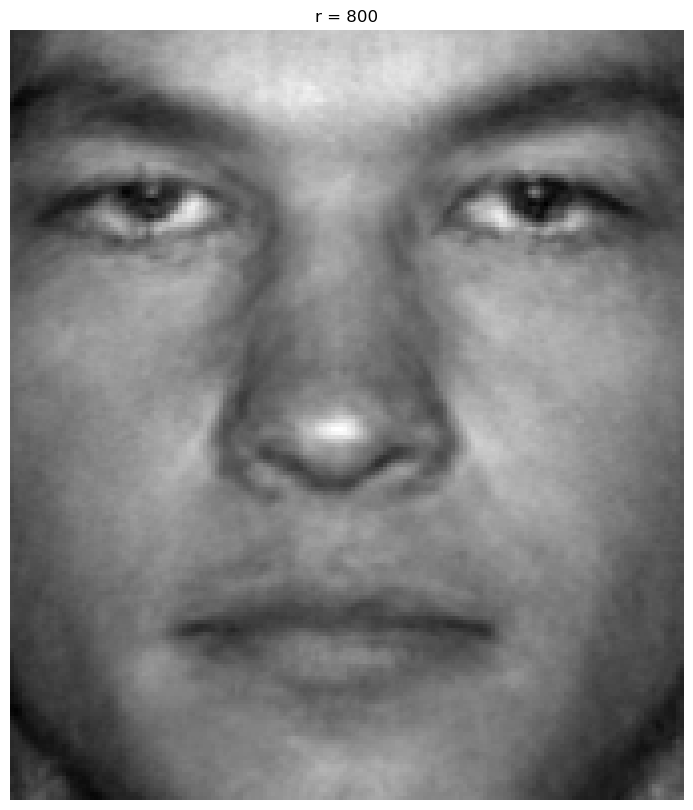

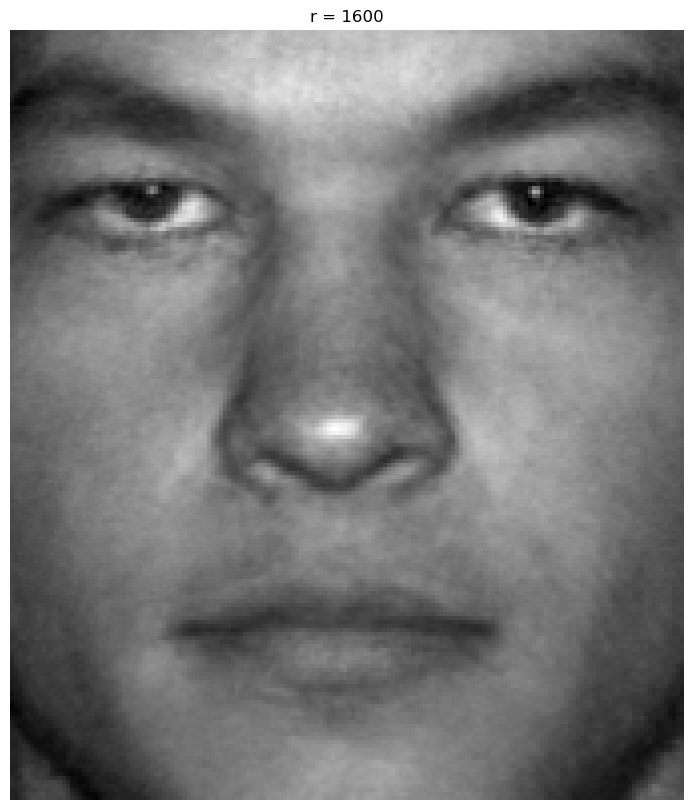

In [4]:
# Make the testFace person 37 
testFace = faces[:, np.sum(nfaces[:36])]

# Subtract the average face
testFaceMS = testFace - avgFace

# Display image of test face
fig3 = plt.figure(3)
imgoriginal = plt.imshow(np.reshape(testFace, (m,n)).T)
imgoriginal.set_cmap('gray')
plt.title('Test Face')
plt.axis('off')

# Create a list of ranks 
r_list = [5, 10, 20, 100, 400, 800, 1600]

# Create a loop to show the image with each rank in r_list
for r in r_list:
    reconFace = avgFace + U[:, :r] @ (U[:, :r].T  @ testFaceMS)
    fig3 = plt.figure()
    img = plt.imshow(np.reshape(reconFace, (m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')

***Now, we'll project two faces onto PCA modes 6 and 7.***

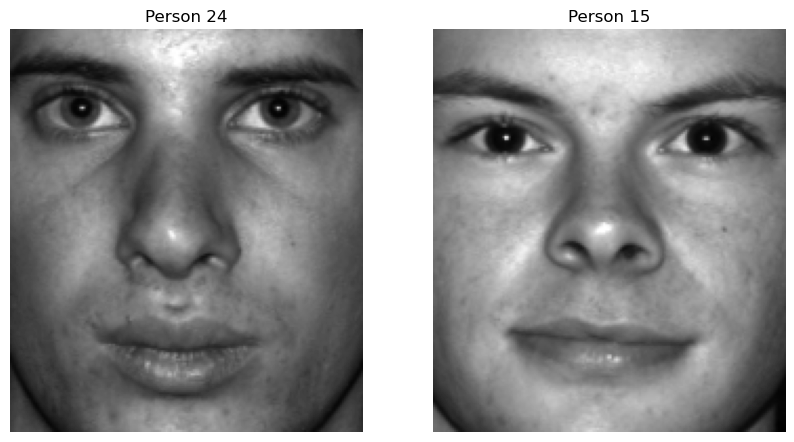

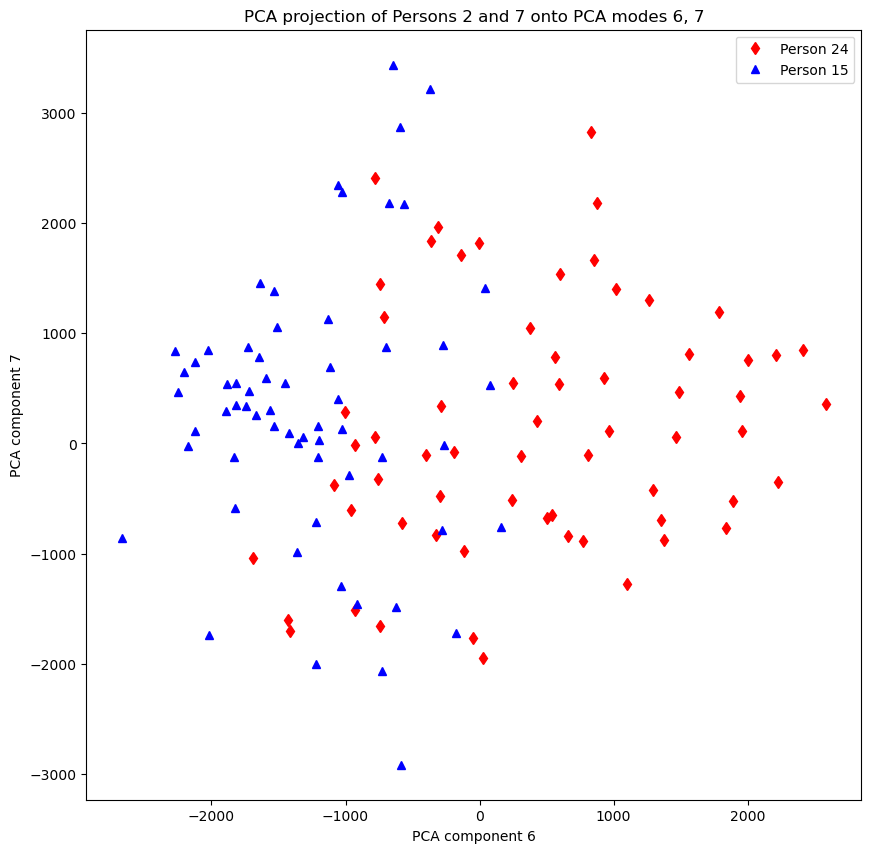

In [5]:
P1num = 24 # Person "one"
P2num = 15 # Person "two"

# Plot the original faces
fig2 = plt.figure(2)
ax1 = fig2.add_subplot(121)
Person2 = faces[:, np.sum(nfaces[:(P1num - 1)])] # person one
ax1.imshow(np.reshape(Person2,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P1num))

ax1 = fig2.add_subplot(122)
Person7 = faces[:, np.sum(nfaces[:(P2num - 1)])] # person two
ax1.imshow(np.reshape(Person7,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P2num))

# Below we gather all of the columns from nfaces that are the images of persons 1 and 2
P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

# Project onto PCA modes
PCAmodes= [6,7] 

M1 = PCAmodes[0]
M2 = PCAmodes[1]

# Project each person into PCA coordinates.
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2
plt.figure(3)
plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:], 'd', color = 'r', label = 'Person ' + str(P1num))
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:], '^', color = 'b', label = 'Person ' + str(P2num))
plt.title('PCA projection of Persons 2 and 7 onto PCA modes ' + str(M1) + ', ' +  str(M2))
plt.xlabel('PCA component ' + str(M1))
plt.ylabel('PCA component ' + str(M2))
plt.legend()
plt.show()

***Using modes 6 and 7 we can see that the points are fairly separated. Let's try the same thing with modes 1 and 2 and see what happens.***

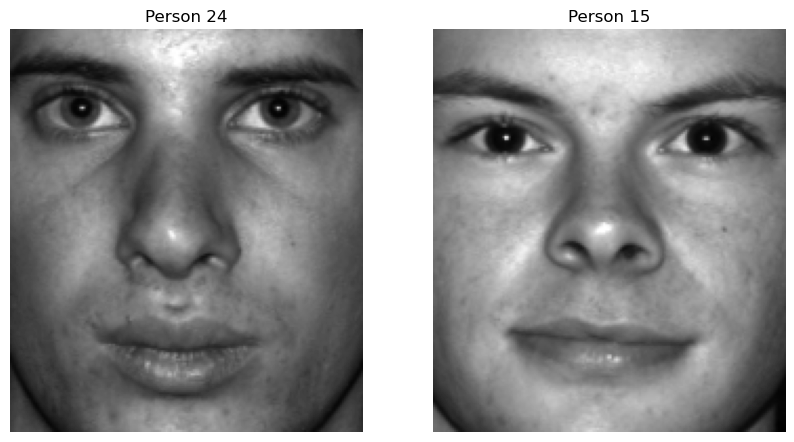

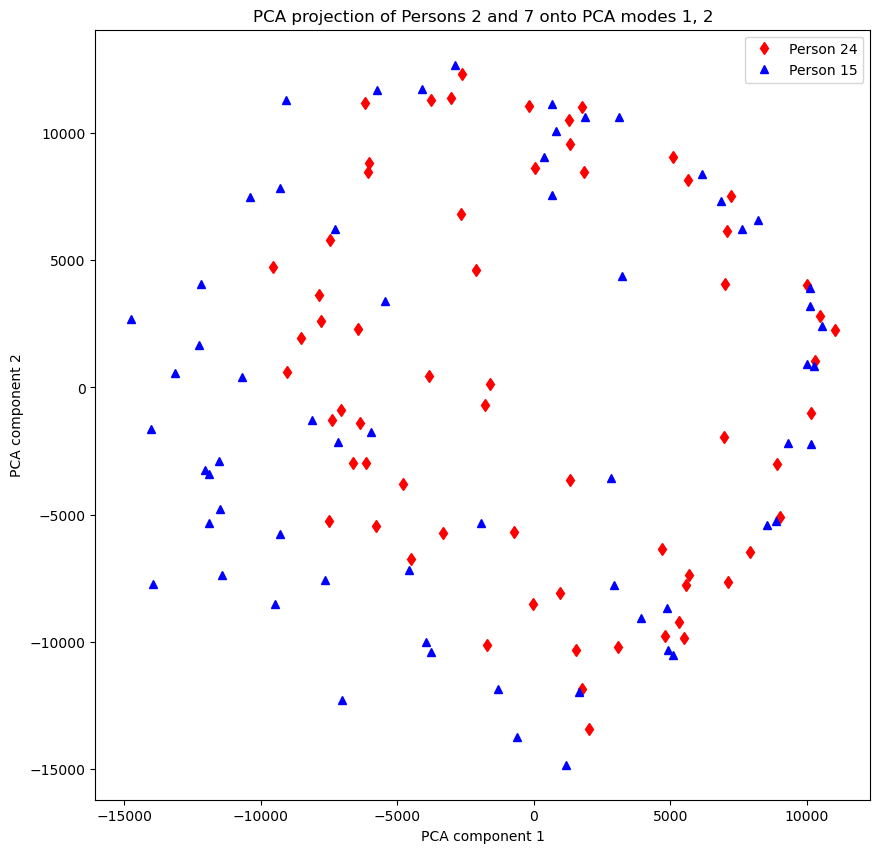

In [6]:
P1num = 24 # Person "one"
P2num = 15 # Person "two"

# Plot the original faces
fig2 = plt.figure(2)
ax1 = fig2.add_subplot(121)
Person2 = faces[:, np.sum(nfaces[:(P1num - 1)])] # person one
ax1.imshow(np.reshape(Person2,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P1num))

ax1 = fig2.add_subplot(122)
Person7 = faces[:, np.sum(nfaces[:(P2num - 1)])] # person two
ax1.imshow(np.reshape(Person7,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P2num))

# Below we gather all of the columns from nfaces that are the images of persons 1 and 2
P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

# Project onto PCA modes
PCAmodes= [1,2] 

M1 = PCAmodes[0]
M2 = PCAmodes[1]

# Project each person into PCA coordinates.
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2
plt.figure(3)
plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:], 'd', color = 'r', label = 'Person ' + str(P1num))
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:], '^', color = 'b', label = 'Person ' + str(P2num))
plt.title('PCA projection of Persons 2 and 7 onto PCA modes ' + str(M1) + ', ' +  str(M2))
plt.xlabel('PCA component ' + str(M1))
plt.ylabel('PCA component ' + str(M2))
plt.legend()
plt.show()

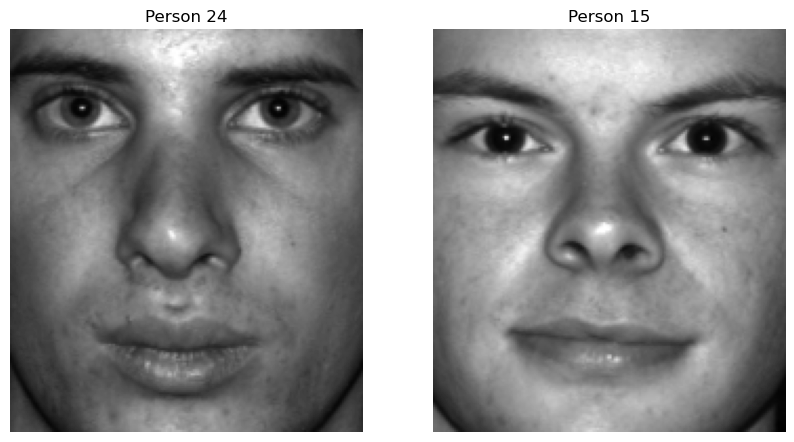

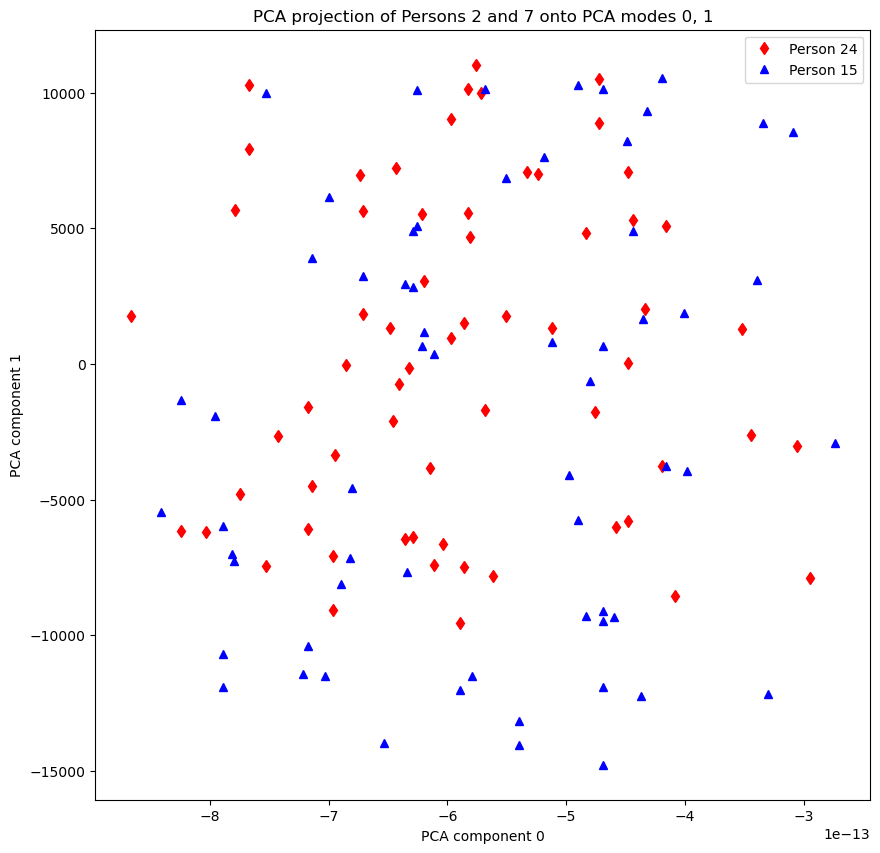

In [7]:
P1num = 24 # Person "one"
P2num = 15 # Person "two"

# Plot the original faces
fig2 = plt.figure(2)
ax1 = fig2.add_subplot(121)
Person2 = faces[:, np.sum(nfaces[:(P1num - 1)])] # person one
ax1.imshow(np.reshape(Person2,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P1num))

ax1 = fig2.add_subplot(122)
Person7 = faces[:, np.sum(nfaces[:(P2num - 1)])] # person two
ax1.imshow(np.reshape(Person7,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P2num))

# Below we gather all of the columns from nfaces that are the images of persons 1 and 2
P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

# Project onto PCA modes
PCAmodes= [0,1] 

M1 = PCAmodes[0]
M2 = PCAmodes[1]

# Project each person into PCA coordinates.
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2
plt.figure(3)
plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:], 'd', color = 'r', label = 'Person ' + str(P1num))
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:], '^', color = 'b', label = 'Person ' + str(P2num))
plt.title('PCA projection of Persons 2 and 7 onto PCA modes ' + str(M1) + ', ' +  str(M2))
plt.xlabel('PCA component ' + str(M1))
plt.ylabel('PCA component ' + str(M2))
plt.legend()
plt.show()

<font size="3"> 
    
In the last two cells, we have learned that projecting onto PCA modes 0 and 1 gives us the least separated results and increasing the values of the PCA modes separates the points more effectively. The reasoning of PCA modes 1 and 2 being more difficult to tell differences is because these modes capture the most significant variations in the data, but these variations are often due to global changes rather than individual-specific features. This makes it difficult to determine if two individuals are different based solely on these initial modes. Because of this, using PCA modes such as 6 and 7 give us a better idea if two individuals are different.
    
</font>

***Now, we'll do the same process with two different people and see if we get the same results.***

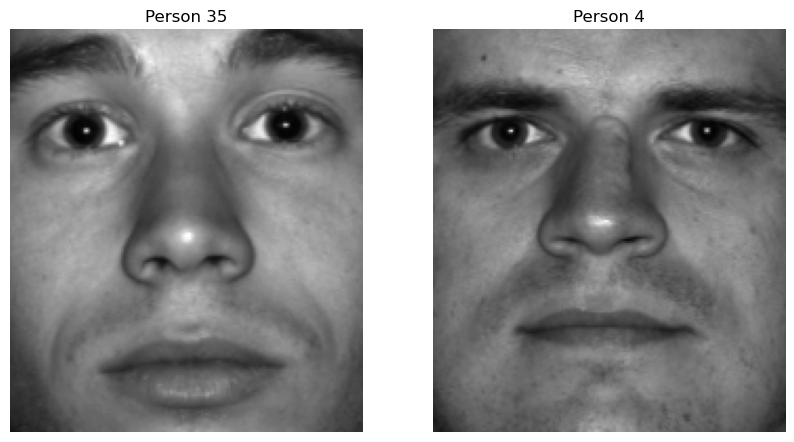

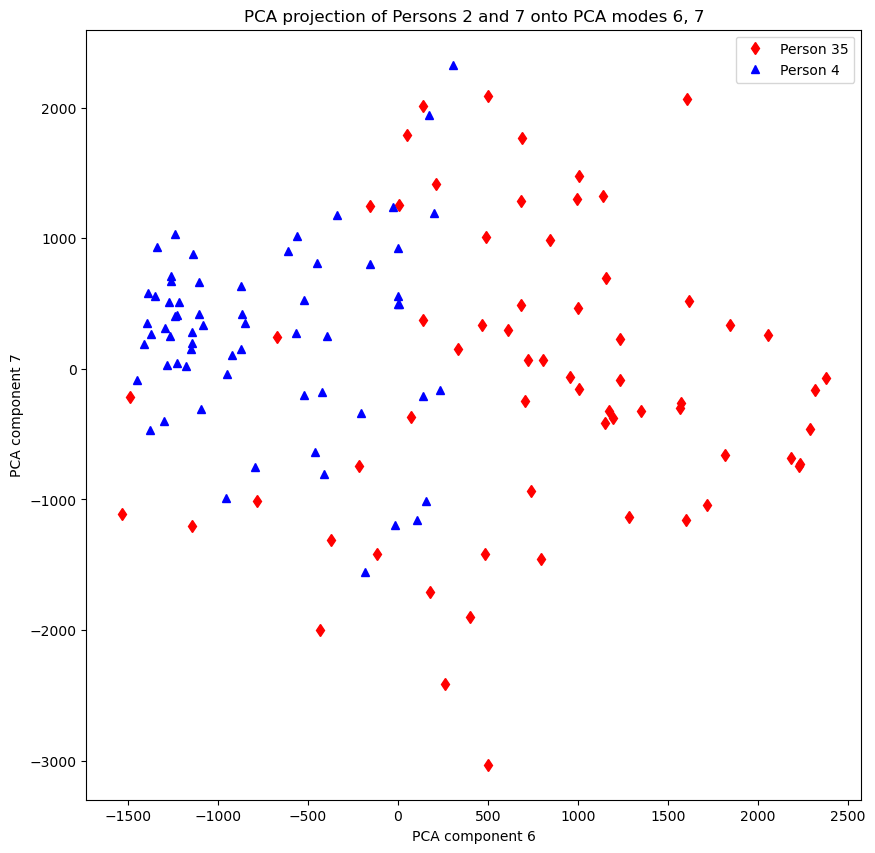

In [8]:
P1num = 35 # Person "one"
P2num = 4 # Person "two"

# Plot the original faces
fig2 = plt.figure(2)
ax1 = fig2.add_subplot(121)
Person2 = faces[:, np.sum(nfaces[:(P1num - 1)])] # person one
ax1.imshow(np.reshape(Person2,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P1num))

ax1 = fig2.add_subplot(122)
Person7 = faces[:, np.sum(nfaces[:(P2num - 1)])] # person two
ax1.imshow(np.reshape(Person7,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P2num))

# Below we gather all of the columns from nfaces that are the images of persons 1 and 2
P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

# Project onto PCA modes
PCAmodes= [6,7] 

M1 = PCAmodes[0]
M2 = PCAmodes[1]

# Project each person into PCA coordinates.
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2
plt.figure(3)
plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:], 'd', color = 'r', label = 'Person ' + str(P1num))
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:], '^', color = 'b', label = 'Person ' + str(P2num))
plt.title('PCA projection of Persons 2 and 7 onto PCA modes ' + str(M1) + ', ' +  str(M2))
plt.xlabel('PCA component ' + str(M1))
plt.ylabel('PCA component ' + str(M2))
plt.legend()
plt.show()

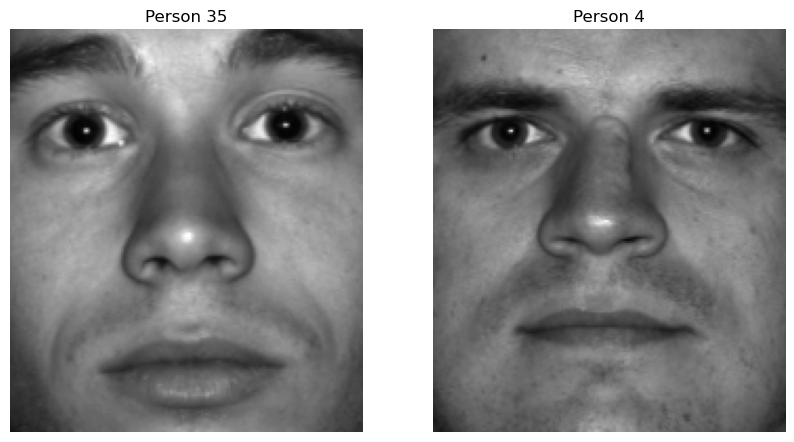

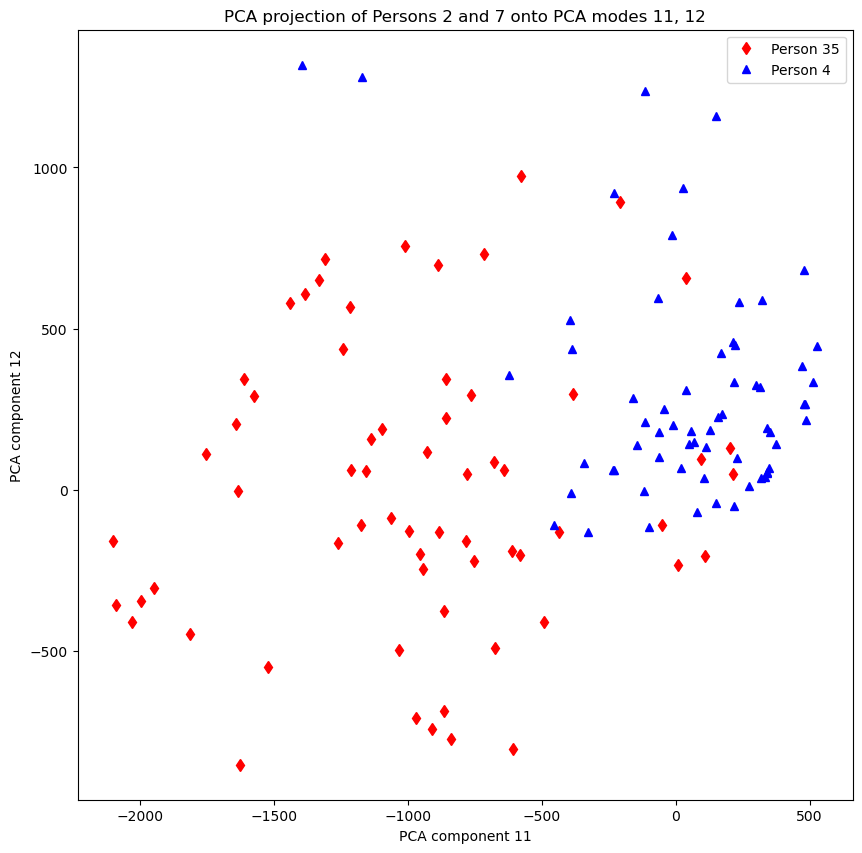

In [19]:
P1num = 35 # Person "one"
P2num = 4 # Person "two"

# Plot the original faces
fig2 = plt.figure(2)
ax1 = fig2.add_subplot(121)
Person2 = faces[:, np.sum(nfaces[:(P1num - 1)])] # person one
ax1.imshow(np.reshape(Person2,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P1num))

ax1 = fig2.add_subplot(122)
Person7 = faces[:, np.sum(nfaces[:(P2num - 1)])] # person two
ax1.imshow(np.reshape(Person7,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P2num))

# Below we gather all of the columns from nfaces that are the images of persons 1 and 2
P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

# Project onto PCA modes
PCAmodes= [11,12] 

M1 = PCAmodes[0]
M2 = PCAmodes[1]

# Project each person into PCA coordinates.
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2
plt.figure(3)
plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:], 'd', color = 'r', label = 'Person ' + str(P1num))
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:], '^', color = 'b', label = 'Person ' + str(P2num))
plt.title('PCA projection of Persons 2 and 7 onto PCA modes ' + str(M1) + ', ' +  str(M2))
plt.xlabel('PCA component ' + str(M1))
plt.ylabel('PCA component ' + str(M2))
plt.legend()
plt.show()

<font size="3"> 
    
After testing with different PCA modes, I found the optimal choice of the two to be 11 with pretty much any other one. In the above example, I use 11 and 12 and it seems to work pretty well. In my testing, it seemed like there may have been a bell curve in effectiveness because from 12, 13 and on the separation was less noticable. This was the same when using smaller numbers and the separation seemed like less.
    
</font>

***Now we'll plot it in 3D using three different PCA modes instead of two.***

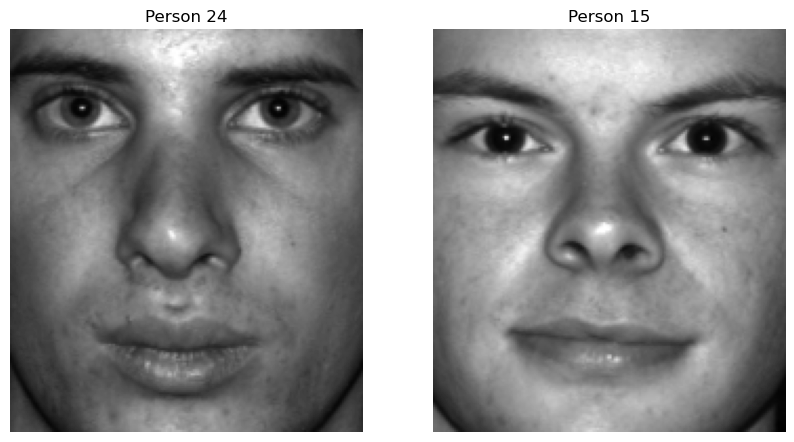

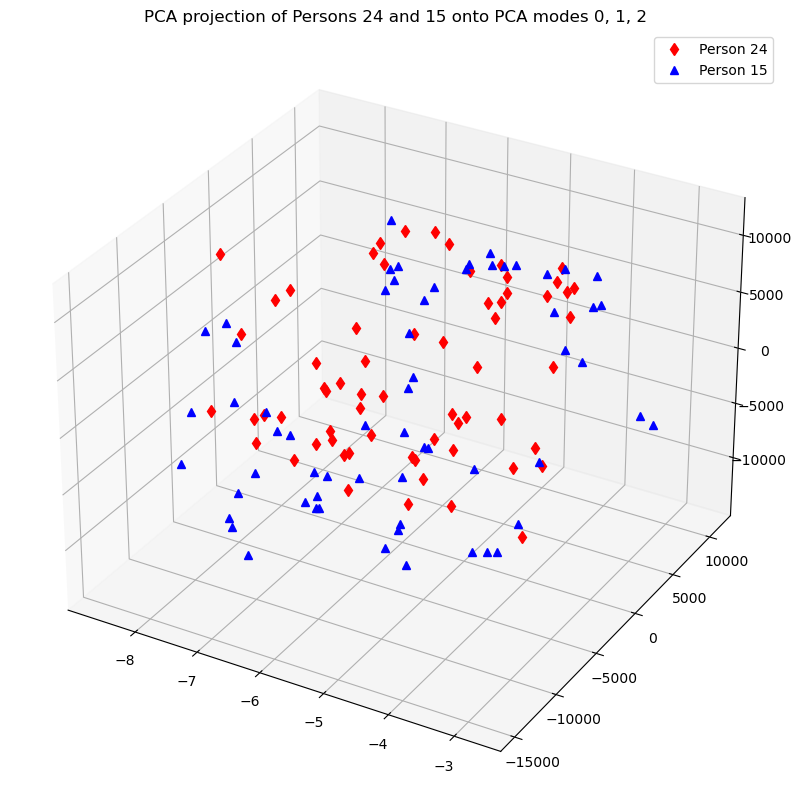

In [10]:
P1num = 24 # Person "one"
P2num = 15 # Person " two"

fig2 = plt.figure(2)
ax1 = fig2.add_subplot(121)
Person2 = faces[:, np.sum(nfaces[:(P1num - 1)])] # person one
ax1.imshow(np.reshape(Person2,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P1num))

ax1 = fig2.add_subplot(122)
Person7 = faces[:, np.sum(nfaces[:(P2num - 1)])] # person two
ax1.imshow(np.reshape(Person7,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P2num))

# Below we gather all of the columns from nfaces that are the images of persons 1 and 2
P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

# We subtract the Average Face to be in alignmnet with the mean subtracted data 
P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

# Choose the PCA coordinates to project
PCAmodes= [0, 1, 2] 

M1 = PCAmodes[0]
M2 = PCAmodes[1]
M3 = PCAmodes[2]

# Project each person into PCA coordinates.
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

# Now we plot all of these
plt.figure(3).add_subplot(projection='3d')
plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],PCACoordsP1[2,:],'d', color = 'r', label = 'Person '+ str(P1num))
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],PCACoordsP2[2,:], '^', color = 'b', label = 'Person ' + str(P2num))
plt.title('PCA projection of Persons ' + str(P1num) + ' and ' + str(P2num) + ' onto PCA modes ' + str(M1) + ', ' +  str(M2)+ ', ' +  str(M3))
plt.legend()
plt.show()

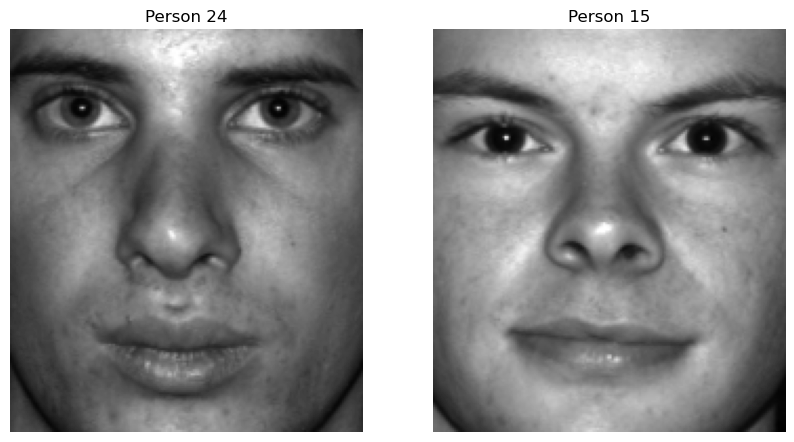

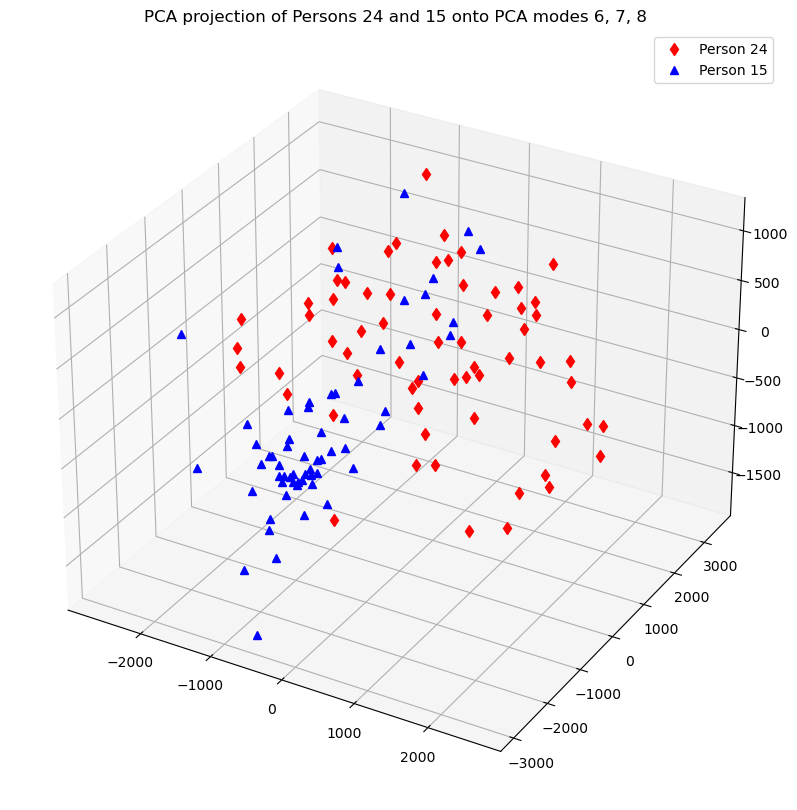

In [9]:
P1num = 24 # Person "one"
P2num = 15 # Person " two"

fig2 = plt.figure(2)
ax1 = fig2.add_subplot(121)
Person2 = faces[:, np.sum(nfaces[:(P1num - 1)])] # person one
ax1.imshow(np.reshape(Person2,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P1num))

ax1 = fig2.add_subplot(122)
Person7 = faces[:, np.sum(nfaces[:(P2num - 1)])] # person two
ax1.imshow(np.reshape(Person7,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P2num))

# Below we gather all of the columns from nfaces that are the images of persons 1 and 2
P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

# We subtract the Average Face to be in alignmnet with the mean subtracted data 
P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

# Choose the PCA coordinates to project
PCAmodes= [6, 7, 8] 

M1 = PCAmodes[0]
M2 = PCAmodes[1]
M3 = PCAmodes[2]

# Project each person into PCA coordinates.
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

# Now we plot all of these
plt.figure(3).add_subplot(projection='3d')
plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],PCACoordsP1[2,:],'d', color = 'r', label = 'Person '+ str(P1num))
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],PCACoordsP2[2,:], '^', color = 'b', label = 'Person ' + str(P2num))
plt.title('PCA projection of Persons ' + str(P1num) + ' and ' + str(P2num) + ' onto PCA modes ' + str(M1) + ', ' +  str(M2)+ ', ' +  str(M3))
plt.legend()
plt.show()

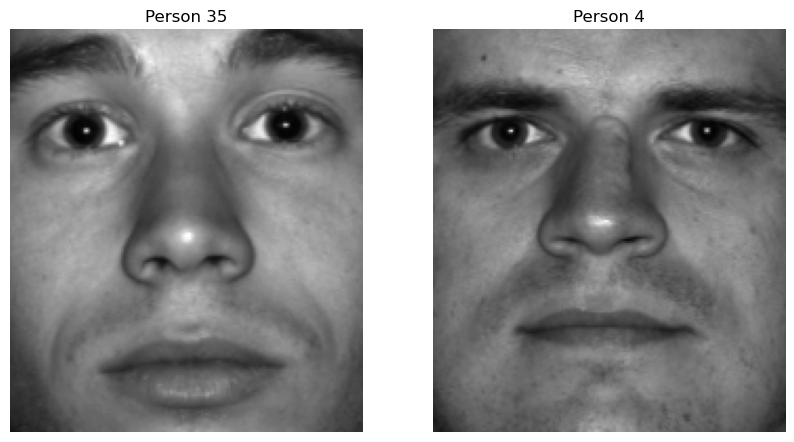

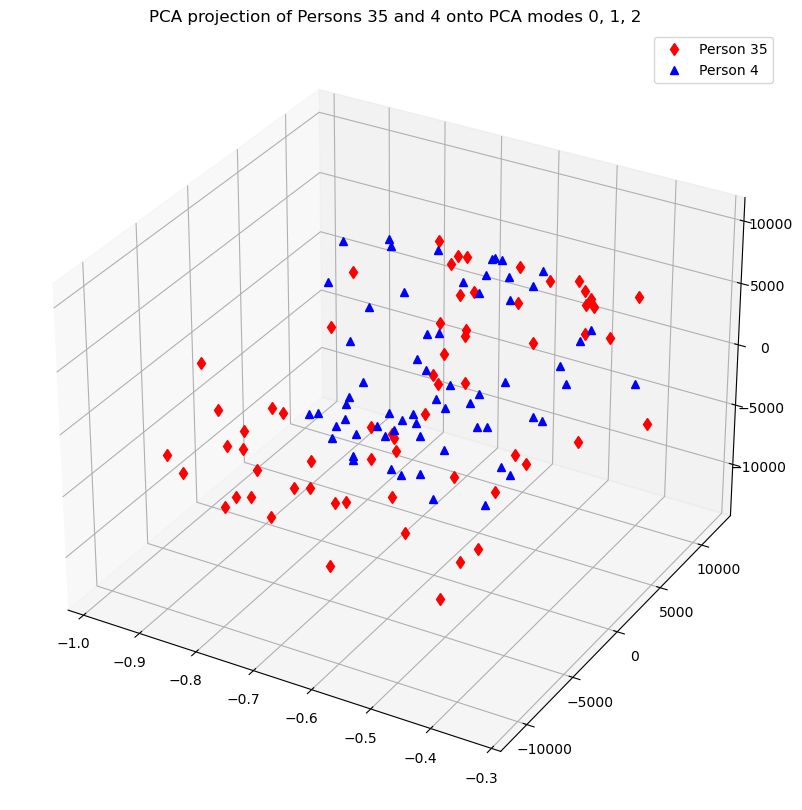

In [12]:
P1num = 35 # Person "one"
P2num = 4 # Person " two"

fig2 = plt.figure(2)
ax1 = fig2.add_subplot(121)
Person2 = faces[:, np.sum(nfaces[:(P1num - 1)])] # person one
ax1.imshow(np.reshape(Person2,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P1num))

ax1 = fig2.add_subplot(122)
Person7 = faces[:, np.sum(nfaces[:(P2num - 1)])] # person two
ax1.imshow(np.reshape(Person7,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P2num))

# Below we gather all of the columns from nfaces that are the images of persons 1 and 2
P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

# We subtract the Average Face to be in alignmnet with the mean subtracted data 
P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

# Choose the PCA coordinates to project
PCAmodes= [0, 1, 2] 

M1 = PCAmodes[0]
M2 = PCAmodes[1]
M3 = PCAmodes[2]

# Project each person into PCA coordinates.
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

# Now we plot all of these
plt.figure(3).add_subplot(projection='3d')
plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],PCACoordsP1[2,:],'d', color = 'r', label = 'Person '+ str(P1num))
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],PCACoordsP2[2,:], '^', color = 'b', label = 'Person ' + str(P2num))
plt.title('PCA projection of Persons ' + str(P1num) + ' and ' + str(P2num) + ' onto PCA modes ' + str(M1) + ', ' +  str(M2)+ ', ' +  str(M3))
plt.legend()
plt.show()

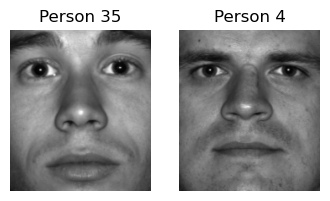

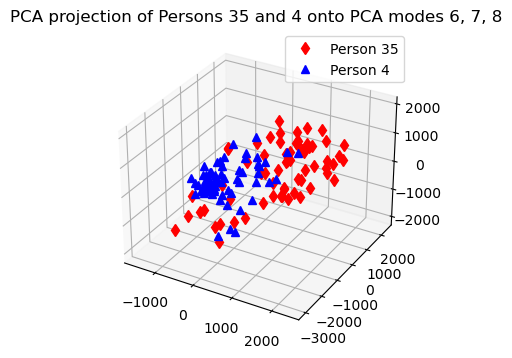

In [19]:
P1num = 35 # Person "one"
P2num = 4 # Person " two"

fig2 = plt.figure(2)
ax1 = fig2.add_subplot(121)
Person2 = faces[:, np.sum(nfaces[:(P1num - 1)])] # person one
ax1.imshow(np.reshape(Person2,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P1num))

ax1 = fig2.add_subplot(122)
Person7 = faces[:, np.sum(nfaces[:(P2num - 1)])] # person two
ax1.imshow(np.reshape(Person7,(m,n)).T, cmap = 'gray')
plt.axis('off')
plt.title('Person ' + str(P2num))

# Below we gather all of the columns from nfaces that are the images of persons 1 and 2
P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

# We subtract the Average Face to be in alignmnet with the mean subtracted data 
P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

# Choose the PCA coordinates to project
PCAmodes= [6, 7, 8] 

M1 = PCAmodes[0]
M2 = PCAmodes[1]
M3 = PCAmodes[2]

# Project each person into PCA coordinates.
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

# Now we plot all of these
plt.figure(3).add_subplot(projection='3d')
plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],PCACoordsP1[2,:],'d', color = 'r', label = 'Person '+ str(P1num))
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],PCACoordsP2[2,:], '^', color = 'b', label = 'Person ' + str(P2num))
plt.title('PCA projection of Persons ' + str(P1num) + ' and ' + str(P2num) + ' onto PCA modes ' + str(M1) + ', ' +  str(M2)+ ', ' +  str(M3))
plt.legend()
plt.show()

***Below, we'll try to use the faces to re-create the image of the minion.***

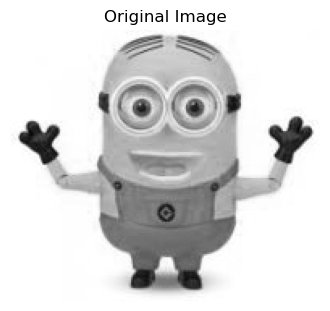

(32256,)


In [20]:
from matplotlib.image import imread

# Read in image of a minion
Face = imread(r"minion-dave.jpg")  
Face = np.mean(Face,-1)

plt.figure(1)
plt.rcParams['figure.figsize'] = [4,8]
img = plt.imshow(Face)
img.set_cmap('gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

Face = np.ndarray.flatten(Face)

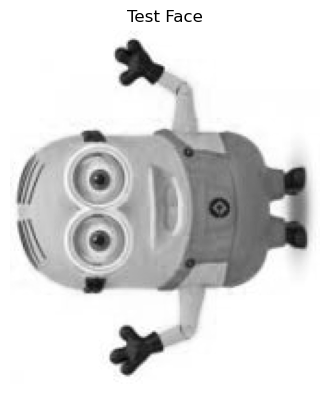

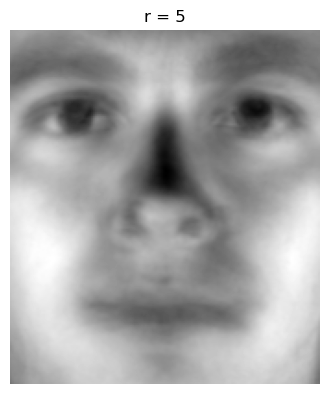

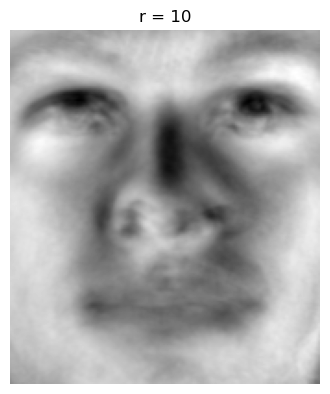

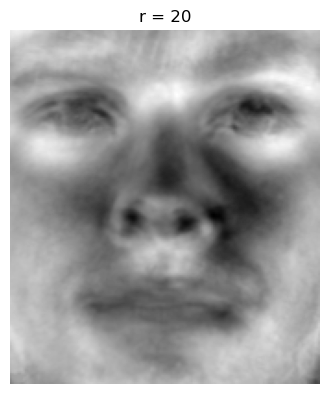

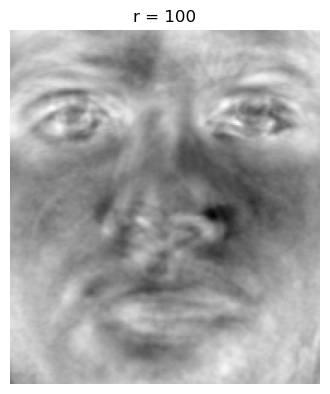

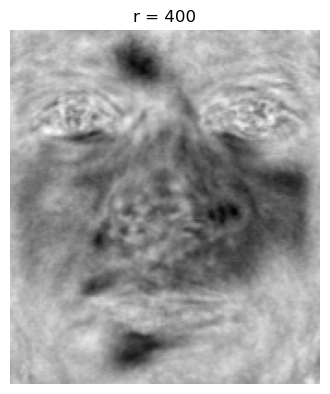

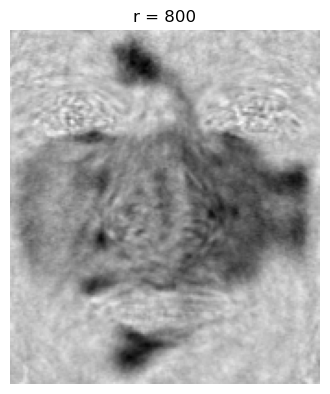

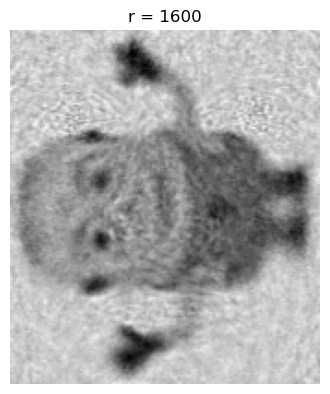

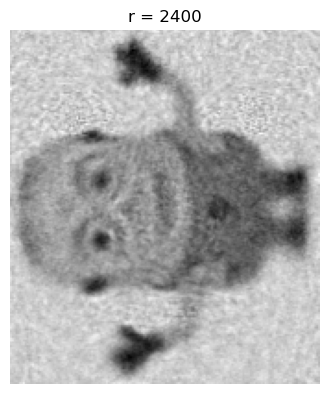

In [15]:
testFace = Face # minion

# Subtract the average face
testFaceMS = testFace - avgFace

# Display image of test face
fig3 = plt.figure(3)
imgoriginal = plt.imshow(np.reshape(testFace, (m,n)).T)
imgoriginal.set_cmap('gray')
plt.title('Test Face')
plt.axis('off')

# Create a list of ranks 
r_list = [5, 10, 20, 100, 400, 800, 1600, 2400]

# Create a loop to show the images with the different ranks in r_list.
for r in r_list:
    reconFace = avgFace + U[:, :r] @ (U[:, :r].T  @ testFaceMS)
    fig3 = plt.figure()
    img = plt.imshow(np.reshape(reconFace, (m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')

<font size="3"> 
    
From the testing above, around rank 400 we can see the images beginning to form but it is not actually recognizable until around rank 800. At rank 1600, the image is much clearer than at 800 but not much change can be noticed beyond that. Once we stop seeing changes, the image is still much more blurry than the original image, but it is at least very recognizable. This process of reconstructing an image using SVD works because it iterates through the faces 'r' times and for each pass, if a pixel is closer to the real value of that location in the original image, that pixel is replaced by the new one. Simply put, this pretty much finds the closest value that exists for each pixel in the face matrix to the pixel in the original image. In this example we use many images of people faces to recreate this but theoretically, if we use a matrix that has more white along the edges and more yellowy images (before becoming grayscale), the output reconstructed image would be more accurate to the original image than what we have now.
    
</font>

### 4a:

***P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]***

<font size="3"> 
    
This line of code is gathering all of the columns in "faces" that are columns of whatever face we have as P2num. This works by looking through "faces" and "np.sum(nfaces[:(P2num-1)])" finds the first element of the person we want. "np.sum(nfaces[:P2num])" finds the last element of the person we want thus giving us the range of all images of this person. This is so that we can use P2 to compare with other faces to get our scatter plot comparison between P1 and P2.
    
</font>

### 4b:

<font size="3"> 
If we wanted to project only the first ten images of each of the two people chosen, we can change the above line to be: 
</font>

##### P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:(P1num-1)])+10]
##### P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:(P2num-1)])+10]  

In [20]:
#We can see this is correct when we run the cell below because it takes in 10 instead of the usual 64.

P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:(P2num-1)])+10]
print(np.shape(P2))

(32256, 10)


### 4c:

***X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1], 1)).T***

<font size="3"> 
    
This code gives us the matrix X which is the one that we use to compute the SVD and to output the first eigenface in an earlier cell. trainingFaces is the matrix with all faces in it. avgFace takes the mean value of each pixel in order to create an "average" face. np.tile takes an input array of "avgFace" and does repetitions of the amount equal to the shape of the 1st index of trainingFaces along each axis. Overall, this line of code subtracts a matrix of the transposed averages from the initial training faces and assigns it to the matrix that we will use to compute the SVD.
    
</font>

### 4d:

***Person2 = faces[:, np.sum(nfaces[:1])]***

***ax1.imshow(np.reshape(Person2,(m,n)).T, cmap = 'gray')***

<font size="3"> 
    
The first line of code finds the second person in "faces" (assuming 0 indexing) and assigns them to "Person2". The second line then outputs a reshaped version of "Person2" as grayscale.
    
</font>